# **K-Nearest Neighbors (KNN) Algorithm Logic**
## **1. Initialization**
* **Define K**: Select the value for 'K', which represents the number of nearest neighbors to consider for classification.
* **Choose Metric**: Select a distance metric (e.g., Euclidean or Manhattan distance) to measure similarity between data points.
## **2. Training (The "Fit" Phase)**
* **Lazy Learning**: Unlike most models, KNN is a "Lazy Learner" that does not build a discriminative model.
* **Data Storage**: The training phase consists solely of storing the labeled numeric dataset as numerical feature vectors in memory.
## **3. Prediction (The "Inference" Phase)**
For every new sample in the **Fashion-MNIST** test set:
1. **Distance Calculation**: Compute the distance between the new sample and every single training sample.
2. **Sorting**: Sort all calculated distances in ascending order.
3. **Neighbor Selection**: Identify the top 'K' training samples with the smallest distances.
4. **Majority Voting**: Retrieve the labels of these 'K' neighbors.
5. **Final Assignment**: Assign the most frequent label (the mode) to the new sample.
## **4. Evaluation and Analysis**
* **Accuracy Assessment**: Compare the predicted labels against the actual labels of the test set to calculate overall model accuracy.
* **Misclassification Analysis**: Review the specific samples that were incorrectly labeled to identify patterns or similarities that confused the model.
* **Parameter Impact**: Explain how changing the value of 'K' or the distance metric influences the classification results.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import os

In [9]:
class KNN:
    def __init__(self, k: int, dist_metric: str):
        self.k = k
        self.dist_metric = dist_metric

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _compute_distance(self, x1, x2):
        if self.dist_metric == 'euclidean':
            # L2 Norm: Standard straight-line distance
            return np.sqrt(np.sum((x1 - x2)**2))
        
        elif self.dist_metric == 'manhattan':
            # L1 Norm: "City block" distance (sum of absolute differences)
            return np.sum(np.abs(x1 - x2))
        
        elif self.dist_metric == 'chebyshev':
            # L-infinity Norm: Maximum absolute difference
            return np.max(np.abs(x1 - x2))
        
        else:
            raise ValueError(f"Unknown metric: {self.dist_metric}")

    def predict(self, X_test):
        predictions = [self._predict_single(x) for x in X_test]
        return np.array(predictions)

    def _predict_single(self, x):
        # 1. Compute distances between x and all examples in training set
        distances = [self._compute_distance(x, x_train) for x_train in self.X_train]

        # 2. Sort by distance and return indices of the first k neighbors 
        k_indices = np.argsort(distances)[:self.k]

        # 3. Extract the labels of the k nearest neighbor samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # 4. Majority vote: most common class label
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

In [10]:
def load_mnist_raw(path, kind='train'):
    """Load Fashion-MNIST data from binary files."""
    labels_path = os.path.join(path, f'{kind}-labels-idx1-ubyte')
    images_path = os.path.join(path, f'{kind}-images-idx3-ubyte')

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        # Reshape to (number of samples, 784) to create feature vectors
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)

    return images, labels


In [11]:
# Load the data (assuming you used the load_mnist_raw function from earlier)
X_train_raw, y_train = load_mnist_raw('data', kind='train')
X_test_raw, y_test = load_mnist_raw('data', kind='t10k')

# Requirement: Represent samples as numerical feature vectors
# Flatten 28x28 images to 784-dimensional vectors and normalize
X_train = X_train_raw.reshape(-1, 784) / 255.0
X_test = X_test_raw.reshape(-1, 784) / 255.0

# Subsampling for speed
X_train_sub = X_train[:5000]
y_train_sub = y_train[:5000]
X_test_sub = X_test[:500]
y_test_sub = y_test[:500]

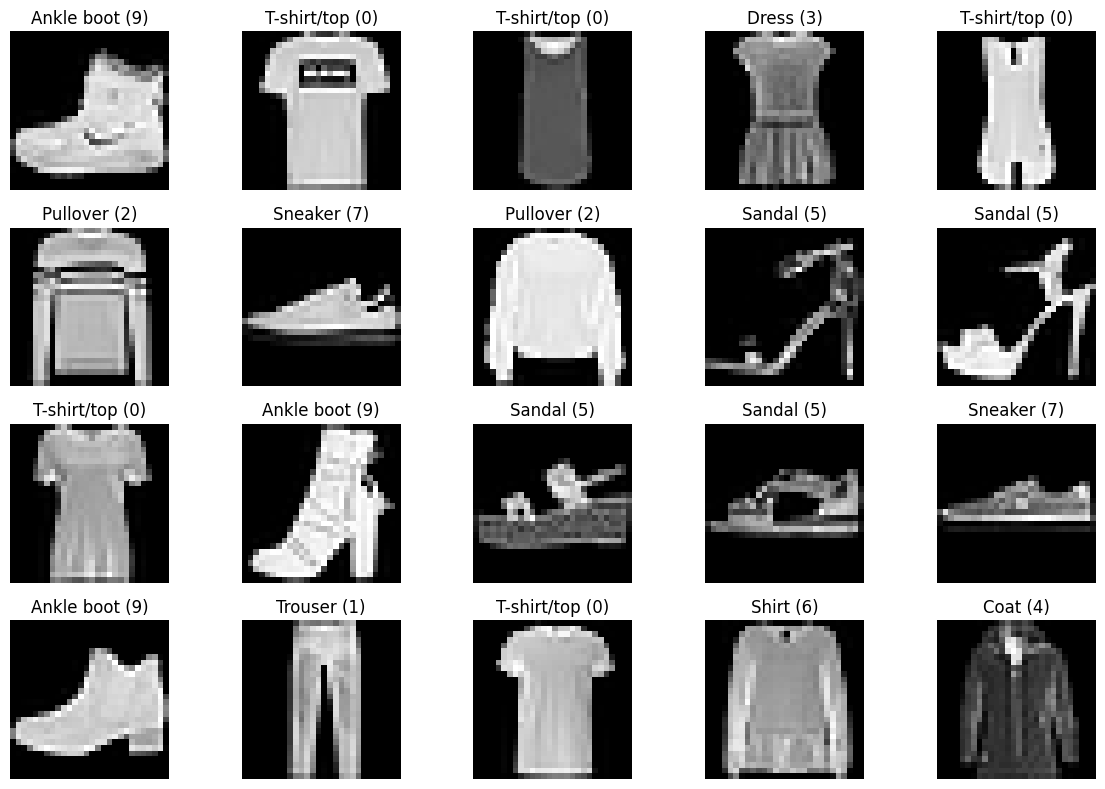

In [12]:
# Define the standard class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot images and its labels
plt.figure(figsize=(12, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    # Reshape the flattened 784 vector back to 28x28 for display
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"{class_names[y_train[i]]} ({y_train[i]})")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [13]:
# Initialize with a chosen K value 
k_value = 7
knn_model = KNN(k=k_value, dist_metric='chebyshev')

# Fit the training data
knn_model.fit(X_train_sub, y_train_sub)

# Run predictions
y_pred = knn_model.predict(X_test_sub)

In [14]:
# Calculate accuracy
accuracy = np.sum(y_pred == y_test_sub) / len(y_test_sub)
print(f"Model Accuracy with K={k_value}: {accuracy * 100:.2f}%")

# Identifying misclassified samples for your report.txt 
misclassified_indices = np.where(y_pred != y_test_sub)[0]
print(f"Number of misclassified samples: {len(misclassified_indices)}")

Model Accuracy with K=7: 60.80%
Number of misclassified samples: 196
